# YADDAT: Yet Another D&D Alignment Test

Web App: [**YADDAT**](https://austin-routt.github.io/YADDAT/)    
**Questions/Items:** 10    
**Unidimensional Constructs:** Ethics and Morality    
**Cronbach's alpha:** 74.99%    
**Cumulative Variance:** 42.12%     


To take the test, click on the link above. What follows is a walkthrough of YADDAT's development.  

## Introduction
As my starting point, I searched through the AB5C subset of the [IPIP](https://ipip.ori.org/) to find potential questions for YADDAT. I took all items that felt appropriate to measure ethic and moral scales, as defined by my interpretation of D&D [alignment](https://dungeonsdragons.fandom.com/wiki/Alignment).  Item response [data](https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/UF52WY/EYX80C&version=1.0) from the **Eugene-Springfield Community Sample** was then downloaded for data analysis.

Now that's established, I'll load the data and clean it.  Once properly cleaned and formatted, I will test the **validity** and **internal consistency** of YADDAT's ethic and moral scales via [**Cronbach's alpha**](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4205511/) and [**Factor Analysis**](https://en.wikipedia.org/wiki/Factor_analysis). 

## Cleaning the Data

First, all of the required packages need to be imported

In [1]:
#Required Imports
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import matplotlib.pyplot as plt
import tabulate
from IPython.display import display, HTML, Markdown, Latex

Next, the question and response files are loaded

In [2]:
#Load the raw data

#1:The Questions

#Read in the excel file
xls = pd.ExcelFile("ScalesFor967items.xls")

#Parse the sheet of interest into a dataframe
df_q = xls.parse(0) 


#2:The Answers

# Read the tab delimited file into a dataframe
filename = 'IPIP2539-1.tab'
df_a = pd.read_csv(filename, sep='\t', engine='python')

#Preview Data.
display(df_q, df_a)

,Item Num,Item,N_Scales,Big5,B5sgn,Seven Factor,SEVsgn,AB5C,AB5sgn,NEO Domain,...,The 16PF,PFsgn,JPIR,JPIsgn,Six FPQ,FPQsgn,MPQ,MPQsgn,Emot_Int,EMOTsgn
0,H133,Accept apologies easily.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H515,Accept challenging tasks.,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H139,Accept others' weaknesses.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H106,Accept people as they are.,6,NaN,NaN,NaN,NaN,IV+II+,NaN,A,...,NaN,NaN,NaN,NaN,Agreeableness,NaN,NaN,NaN,NaN,NaN
4,H554,Accomplish a lot of work.,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Energy Level,NaN,Achievement,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,E71,Would never make a high risk investment.,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Risk Taking,-,NaN,NaN,HA,NaN,NaN,NaN
963,P367,Would never take things that aren't mine.,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Responsibility,NaN,NaN,NaN,AG,-,NaN,NaN
964,P485,Would not be a good comedian.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Exhibition,-,NaN,NaN,NaN,NaN
965,H142,Wouldn't harm a fly.,1,NaN,NaN,NaN,NaN,II+V-,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ID,A1,A10,A100,A101,A102,A103,A104,A105,A106,...,X89,X90,X91,X92,X93,X95,X96,X97,X98,X99
0,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,1.0,4.0,2.0,2.0,4.0,2.0,5.0,4.0
1,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,4.0,1.0,3.0,1.0,2.0,4.0,4.0,5.0,3.0
2,1003,3.0,2.0,4.0,3.0,3.0,1.0,1.0,1.0,2.0,...,5.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,4.0,2.0
3,1004,5.0,2.0,4.0,4.0,2.0,1.0,1.0,2.0,1.0,...,4.0,4.0,2.0,3.0,1.0,2.0,4.0,2.0,5.0,4.0
4,1005,5.0,4.0,4.0,4.0,2.0,1.0,1.0,1.0,2.0,...,3.0,3.0,1.0,4.0,1.0,2.0,4.0,2.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,2462,3.0,4.0,2.0,3.0,2.0,1.0,1.0,1.0,2.0,...,3.0,3.0,3.0,4.0,4.0,2.0,5.0,1.0,3.0,1.0
1138,2463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1139,2464,5.0,2.0,3.0,4.0,4.0,3.0,1.0,1.0,5.0,...,2.0,2.0,1.0,4.0,2.0,3.0,4.0,3.0,3.0,4.0
1140,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create lists of question item numbers that represent the constructs of ethics and morality. Also, define the items that are negatively keyed.

In [3]:
#Define YADDAT 0.01 through ethic (Law-Chaos) and moral (Good-Evil) constructs

#Create lists for the chosen ethics and morality items. Also, create a combined list.
ethicItems_0 = ['X136','X150','H296','H575','H1346','H498','H579','E122','X118','H309','H215','H941','H250','H1327','H400','E7','E146','X274','X146','H925','X77','X204','H1140','H294','H170','E52','X263','E35','H88','H1351','X173','H870','E46','H1350','H303','X122','H926']
moralItems_0 = ['H794','H1328', 'H1100', 'X253', 'H714', 'H29','H1130','X259','H183','H198','E115','X70','H126','X203','X244','X210','H33','X113','H159','H105','H792','E166','H22','X177','H153','H435','E121','H98','H109', 'H721', 'X227', 'X185']
YADDATItems_0 = ethicItems_0+moralItems_0

#Define which items are negative
negativeEthicItems = ['H575','H1346','H498','H579','E122','H941','H1327','H400','E7','E146','H925','X204','H1140','E35','H88','H870','E46','X122','H926']
negativeMoralItems = ['H794','H1328','H714','X70','X203','X244','X210','X113','H792','E166','H435','E121','H98','H721','X227','X185']
negativeItems = negativeEthicItems+negativeMoralItems

Now, we'll make the initial YADDAT item pool from appropriate questions taken from the AB5C subset of the question data.

In [4]:
#Create a list of columns for the AB5C data
AB5CList = ['Item Num', 'Item', 'AB5C']

#Create the AB5C dataframe, dropping rows with missing data
AB5C = df_q[AB5CList].dropna(axis=0, how='any')

#Create YADDAT 0.01 by filtering the items using the YADDATItems_0 list
YADDAT_0 = AB5C[AB5C['Item Num'].isin(YADDATItems_0)]

#Set the 'Item Num' column as the dataframe index
YADDAT_0 = YADDAT_0.set_index('Item Num')

#Display YADDAT 0.01
display(YADDAT_0)

,Item,AB5C
Item Num,,
H794,Act at the expense of others.,II+III+
H1100,Am concerned about others.,II+III-
X253,Am deeply moved by others' misfortunes.,II+III-
H941,Am guided by my moods.,IV+III+
X203,Am indifferent to the feelings of others.,II+II+
...,...,...
X150,Try to follow the rules.,II+III+
H170,Wait for my turn.,I+II-
H303,Want things to proceed according to plan.,III+IV-


Following that, a dataframe is created for item responses of YADDAT.

In [5]:
#Create a combined dataframe for ethical and moral constructs
combinedDF_0 = df_a[YADDATItems_0]

#Delete rows that have at least 1 missing value
combinedDF_1 = combinedDF_0.dropna(axis=0, how='any')

#Convert float to int
combinedDF_1 = combinedDF_1[YADDATItems_0].astype(int)

#Preview the dataframes
display(combinedDF_1)

,X136,X150,H296,H575,H1346,H498,H579,E122,X118,H309,...,H22,X177,H153,H435,E121,H98,H109,H721,X227,X185
2,3,3,2,2,4,3,3,3,4,2,...,3,1,4,1,2,4,4,1,1,2
3,4,4,4,1,1,3,1,2,4,4,...,4,4,5,2,2,1,5,1,1,2
4,5,5,5,1,1,4,1,1,5,4,...,5,5,4,4,1,1,5,2,1,2
6,4,4,4,3,4,3,1,4,4,4,...,4,4,5,4,3,4,5,3,4,4
7,4,4,4,2,2,3,2,2,4,3,...,4,4,5,2,2,2,4,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,2,4,3,2,2,2,1,3,2,3,...,5,5,4,4,1,3,5,2,1,2
1125,5,5,5,1,1,1,1,4,5,5,...,4,5,5,4,1,4,5,1,1,4
1129,2,3,2,2,2,5,3,2,2,2,...,3,5,5,1,1,1,4,3,1,3
1137,4,4,4,1,2,2,1,4,4,4,...,4,3,4,2,1,2,5,4,2,3


Since the data consists of raw item responses, scoring must commence. Like the AB5C, both of YADDAT's scales have positively and negatively framed questions. Positive item responses remain unchanged, but responses associated with negative items will need to be reversed (i.e. 1 &#8594; 5, 2 &#8594; 4, 3 &#8594; 3, 4 &#8594; 2, and 5 &#8594; 1)

In [6]:
#Define a key to negative items
revrs = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}

#Reverse score negative columns using the key
combinedDF_2 = combinedDF_1
combinedDF_2[negativeItems] = combinedDF_2[negativeItems].replace(revrs) 


#Preview the new moral dataframe
display(combinedDF_2)

,X136,X150,H296,H575,H1346,H498,H579,E122,X118,H309,...,H22,X177,H153,H435,E121,H98,H109,H721,X227,X185
2,3,3,2,4,2,3,3,3,4,2,...,3,1,4,5,4,2,4,5,5,4
3,4,4,4,5,5,3,5,4,4,4,...,4,4,5,4,4,5,5,5,5,4
4,5,5,5,5,5,2,5,5,5,4,...,5,5,4,2,5,5,5,4,5,4
6,4,4,4,3,2,3,5,2,4,4,...,4,4,5,2,3,2,5,3,2,2
7,4,4,4,4,4,3,4,4,4,3,...,4,4,5,4,4,4,4,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,2,4,3,4,4,4,5,3,2,3,...,5,5,4,2,5,3,5,4,5,4
1125,5,5,5,5,5,5,5,2,5,5,...,4,5,5,2,5,2,5,5,5,2
1129,2,3,2,4,4,1,3,4,2,2,...,3,5,5,5,5,5,4,3,5,3
1137,4,4,4,5,4,4,5,2,4,4,...,4,3,4,4,5,4,5,2,4,3


Now the constructs will be purified with an initial factor analysis, assuming only two factors exist.

In [7]:
# Create a factor analysis object and perform factor analysis to divide items into 2 factors (i.e. the 2 constructs)
combinedfa = FactorAnalyzer(rotation="varimax", n_factors=2)

# Get the factor loadings
combinedfa.fit(combinedDF_2)

# New headings
H = ["Item Num","factor1", "factor2", "factor3", "factor4", "factor5", "factor6", "factor7", "factor8", "factor9", "factor10","factor11", "factor12", "factor13", "factor14", "factor15", "factor16", "factor17"]
display(HTML(tabulate.tabulate(combinedfa.loadings_, headers=H,showindex=YADDATItems_0, tablefmt='html')))

Item Num,factor1,factor2
X136,0.395672,0.204668
X150,0.603549,0.107178
H296,0.584861,0.174011
H575,0.488488,0.161693
H1346,0.621517,0.207049
H498,0.544435,0.190837
H579,0.475155,0.258822
E122,0.413292,-0.102627
X118,0.442331,-0.0952163
H309,0.434376,-0.129043


Using the factor loadings, we'll filter out questions that have an absolute correlation at or below 50%.

In [8]:
# Create a dataframe from the factor loadings
dataframe=pd.DataFrame(combinedfa.loadings_,index=YADDATItems_0) 

# Only include items that have a factor coorelation greater than 50%.
highcorr = dataframe[abs(dataframe) >.55]

#Create a list to hold the high correlation items
highcorrItems = []

# Iterate over the index range from o to max number of factors in dataframe, in this case 2
for index in range(highcorr.shape[1]):
    print('Factor Number : ', index+1)
   # Select column by index position using iloc[]
    columnSeriesObj = highcorr.iloc[: , index].dropna()
   #Append to highcorrItems list
    highcorrItems.append(list(columnSeriesObj.index))
   #Display the factor
    display(YADDAT_0.loc[list(columnSeriesObj.index),:])
    print()
#Display item list
display(highcorrItems)

Factor Number :  1


,Item,AB5C
Item Num,,
X150,Try to follow the rules.,II+III+
H296,Respect authority.,II+III+
H1346,Break rules.,II+III+
H250,Do things by the book.,III+V-
H294,Stick to the rules.,III+II+



Factor Number :  2


,Item,AB5C
Item Num,,
H1100,Am concerned about others.,II+III-
H1130,Sympathize with others' feelings.,II+II+
X203,Am indifferent to the feelings of others.,II+II+
X244,Feel little concern for others.,II+II+
X227,Am not interested in other people's problems.,II+II+


[['X150', 'H296', 'H1346', 'H250', 'H294'],
 ['H1100', 'H1130', 'X203', 'X244', 'X227']]

The purified dataframes can now be made.

In [9]:
#Seperate item lists
ethicItems_1 = highcorrItems[0]
moralItems_1 = highcorrItems[1]
YADDATItems_1 = ethicItems_1+moralItems_1

#Create new dataframes
ethicDF_3 = combinedDF_2[ethicItems_1]
moralDF_3 = combinedDF_2[moralItems_1]
combinedDF_3 = combinedDF_2[YADDATItems_1]

#Display the combined dataframe
display(combinedDF_3)

,X150,H296,H1346,H250,H294,H1100,H1130,X203,X244,X227
2,3,2,2,2,2,5,5,5,5,5
3,4,4,5,4,4,5,4,5,5,5
4,5,5,5,4,5,5,5,5,5,5
6,4,4,2,4,4,4,4,4,4,2
7,4,4,4,2,4,5,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...
1124,4,3,4,2,4,5,4,5,5,5
1125,5,5,5,3,4,5,5,5,5,5
1129,3,2,4,1,3,5,5,5,5,5
1137,4,4,4,4,4,5,4,4,4,4


## Adequacy Tests

Adequacy tests must now verify that the purified dataframes are suitable for factor analysis.

### Bartlett’s Test

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [10]:
#Bartlett’s Test

ethic_chi_square_value,ethic_p_value=calculate_bartlett_sphericity(ethicDF_3)
moral_chi_square_value,moral_p_value=calculate_bartlett_sphericity(moralDF_3)
combined_chi_square_value,combined_p_value=calculate_bartlett_sphericity(combinedDF_3)

H = ["Data","Chi Square", "p-value"]

table = [["Ethic",ethic_chi_square_value,ethic_p_value],
         ["Moral",moral_chi_square_value,moral_p_value],
         ["Combined",combined_chi_square_value,combined_p_value]]

display(HTML(tabulate.tabulate(table,headers=H, tablefmt='html')))

Data,Chi Square,p-value
Ethic,649.064,2.6386e-133
Moral,764.173,5.11968e-158
Combined,1460.73,4.93788e-277


### Kaiser-Meyer-Olkin Test

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 

+ 0.00 to 0.49 unacceptable.
+ 0.50 to 0.59 miserable.
+ 0.60 to 0.69 mediocre.
+ 0.70 to 0.79 middling.
+ 0.80 to 0.89 meritorious.
+ 0.90 to 1.00 marvelous.

Ref:   
Stephanie Glen. "Kaiser-Meyer-Olkin (KMO) Test for Sampling Adequacy" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/kaiser-meyer-olkin/

In [11]:
ethic_kmo_all,ethic_kmo_model=calculate_kmo(ethicDF_3)
moral_kmo_all,moral_kmo_model=calculate_kmo(moralDF_3)
combined_kmo_all,combined_kmo_model=calculate_kmo(combinedDF_3)

H = ["Data","KMO Model"]
table = [["Ethic",ethic_kmo_model],
         ["Moral",moral_kmo_model],
         ["Combined",combined_kmo_model]]

display(HTML(tabulate.tabulate(table,headers = H, tablefmt='html')))

Data,KMO Model
Ethic,0.819263
Moral,0.791343
Combined,0.812281


## Factor Analysis

### Choosing the Number of Factors

The number of factors can be determined numerically and visually. 

In [12]:
# Create factor analysis object and perform factor analysis
ethicfa = FactorAnalyzer()
moralfa = FactorAnalyzer()
combinedfa = FactorAnalyzer()

ethicfa.fit(ethicDF_3)
moralfa.fit(moralDF_3)
combinedfa.fit(combinedDF_3)

# Check Eigenvalues
ethicValues, ethicVectors = ethicfa.get_eigenvalues()
ethicFactors = list(ethicValues[ethicValues>1])

moralValues, moralVectors = moralfa.get_eigenvalues()
moralFactors = list(moralValues[moralValues>1])

combinedValues, combinedVectors = combinedfa.get_eigenvalues()
combinedFactors = list(combinedValues[combinedValues>1])

table = [["Ethic Factors",ethicFactors], ["Moral Factors",moralFactors], ["Combined Factors",combinedFactors]]

display(HTML(tabulate.tabulate(table,tablefmt='html')))

Ethic Factors,[2.6183738117886386]
Moral Factors,[2.690500313222284]
Combined Factors,"[3.1041044849418036, 2.244980092174235]"


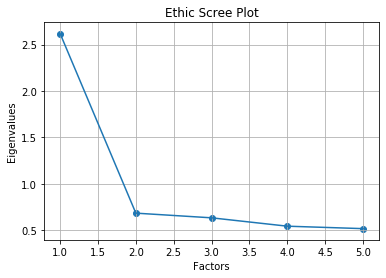

In [13]:
# Create Ethics scree plot using matplotlib
plt.scatter(range(1,ethicDF_3.shape[1]+1),ethicValues)
plt.plot(range(1,ethicDF_3.shape[1]+1),ethicValues)
plt.title('Ethic Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

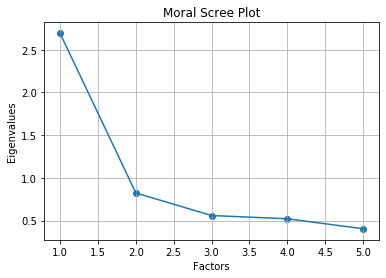

In [14]:
# Create Moral scree plot using matplotlib
plt.scatter(range(1,moralDF_3.shape[1]+1),moralValues)
plt.plot(range(1,moralDF_3.shape[1]+1),moralValues)
plt.title('Moral Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

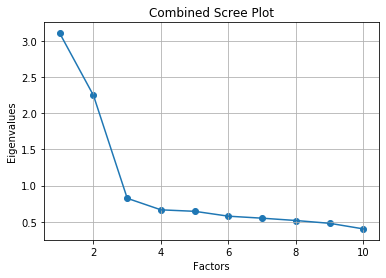

In [15]:
# Create Combined scree plot using matplotlib
plt.scatter(range(1,combinedDF_3.shape[1]+1),combinedValues)
plt.plot(range(1,combinedDF_3.shape[1]+1),combinedValues)
plt.title('Combined Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

### Performing Factor Analysis

In [16]:
# Create factor analysis object and perform factor analysis, factors are not orthogonal

combinedfa_3 = FactorAnalyzer(rotation="varimax", n_factors=2)


combinedfa_3.fit(combinedDF_3)

H = ["factor1", "factor2", "factor3", "factor4", "factor5", "factor6", "factor7", "factor8", "factor9", "factor10","factor11", "factor12", "factor13", "factor14", "factor15", "factor16", "factor17"]

display(HTML(tabulate.tabulate(combinedfa_3.loadings_, headers=H, showindex = YADDATItems_1, tablefmt='html')))
print()


factor1,factor2,factor3
X150,0.07445,0.637913
H296,0.0960184,0.650397
H1346,0.146497,0.61641
H250,-0.0817952,0.585674
H294,0.104923,0.674859
H1100,0.576206,0.117012
H1130,0.526377,0.105627
X203,0.693681,0.0490706
X244,0.733686,0.0672382
X227,0.699648,-0.00668542


In [17]:
# Get variance of each factors
H = ["Measure","factor1", "factor2", "factor3", "factor4", "factor5"]
SI = ["SS Loadings","Proportion Var", "Cumulative Var"]
display(HTML(tabulate.tabulate(combinedfa_3.get_factor_variance(), headers=H, showindex = SI, tablefmt='html')))

Measure,factor1,factor2
SS Loadings,2.172,2.04018
Proportion Var,0.2172,0.204018
Cumulative Var,0.2172,0.421219


## Cronbach's Alpha


In [18]:
#Define the cronbach's alpha function
def cronbachs_alpha(df):
    #Get the correlation matrix for the dataframe.
    df_corr = df.corr()
    
    #Calculate the number of items, N, and the mean correlation between the items, r.
    # N: number of dataframe columns
    N = df.shape[1]
    
    # r: Loop through the columns and append every relevant correlation to an array calles "rs". Then, calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    r = np.mean(rs)
    
   # Use the formula to calculate Cronbach's Alpha 
    cronbachs_alpha = (N * r) / (1 + (N - 1) * r)
    return cronbachs_alpha




table = [["Ethics Alpha", str(cronbachs_alpha(ethicDF_3))],
        ["Moral Alpha", str(cronbachs_alpha(moralDF_3))],
        ["Combined Alpha",str(cronbachs_alpha(combinedDF_3))]]

display(HTML(tabulate.tabulate(table, tablefmt='html')))

Ethics Alpha,0.772026
Moral Alpha,0.783864
Combined Alpha,0.749925
